## Task 1: Before NormaliZation

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Loading DataSet

In [14]:
data = pd.read_csv("Dataset.csv")
df = pd.DataFrame(data)
df.head()

,"Flow Depth, D [m]",SLOPE,CHARGE,"Channel Width, B [m]","Particle size, d [m]",Bed Form
0,5.09,0.000204,34721.4,306.0,0.000978,2
1,5.09,0.000098,15114.2,261.0,0.000978,2
2,4.89,0.000077,7200.2,258.0,0.000978,2
3,4.79,0.000066,5243.3,257.0,0.000978,2
4,3.54,0.000348,125324.7,449.2,0.000978,2


In [15]:
print("Missing values:")
print(df.isnull().sum())

df = df.dropna()
print(f"\nDataset shape after removing missing values: {df.shape}")

print("\nData types:")
print(df.dtypes)

Missing values:
Flow Depth, D [m]       4
SLOPE                   4
CHARGE                  0
Channel Width, B [m]    4
Particle size, d [m]    4
Bed Form                0
dtype: int64

Dataset shape after removing missing values: (2548, 6)

Data types:
Flow Depth, D [m]       float64
SLOPE                   float64
CHARGE                   object
Channel Width, B [m]    float64
Particle size, d [m]    float64
Bed Form                  int64
dtype: object


In [16]:
print("Summary Statistics:")
print(df.describe())

print("\nClass Distribution:")
print(df['Bed Form'].value_counts())


Summary Statistics:
       Flow Depth, D [m]         SLOPE  Channel Width, B [m]  \
count        2548.000000  2.548000e+03           2548.000000   
mean            2.718144  5.570980e-04            214.912591   
std             1.794157  6.710274e-04            100.474557   
min             0.080000  5.600000e-09             16.580000   
25%             1.570000  1.799794e-04            157.278756   
50%             2.265822  4.338693e-04            190.683166   
75%             3.492500  8.627090e-04            269.250000   
max            11.000000  2.209983e-02            625.500000   

       Particle size, d [m]     Bed Form  
count           2548.000000  2548.000000  
mean               0.011168     2.043171  
std                0.023022     0.230439  
min                0.000260     2.000000  
25%                0.001112     2.000000  
50%                0.002840     2.000000  
75%                0.013188     2.000000  
max                0.177230     6.000000  

Class Distribut

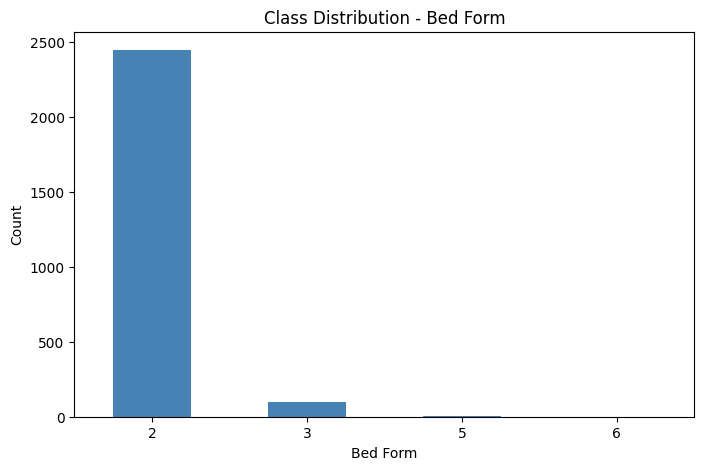

In [17]:
plt.figure(figsize=(8, 5))
df['Bed Form'].value_counts().plot(kind='bar', color='steelblue')
plt.title('Class Distribution - Bed Form')
plt.xlabel('Bed Form')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

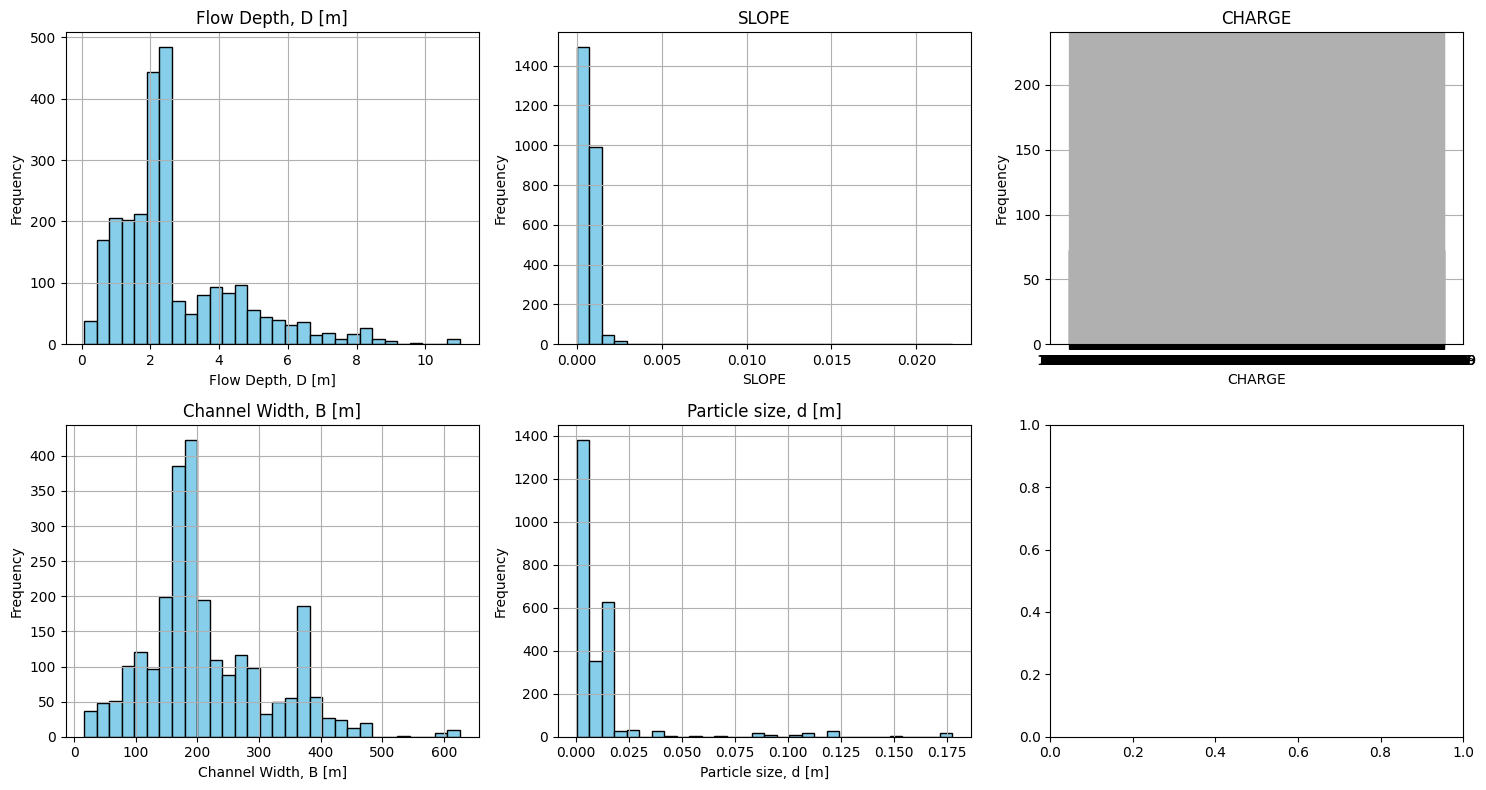

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
features = df.columns[:-1]

for idx, col in enumerate(features):
    ax = axes[idx//3, idx%3]
    df[col].hist(bins=30, ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(f'{col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


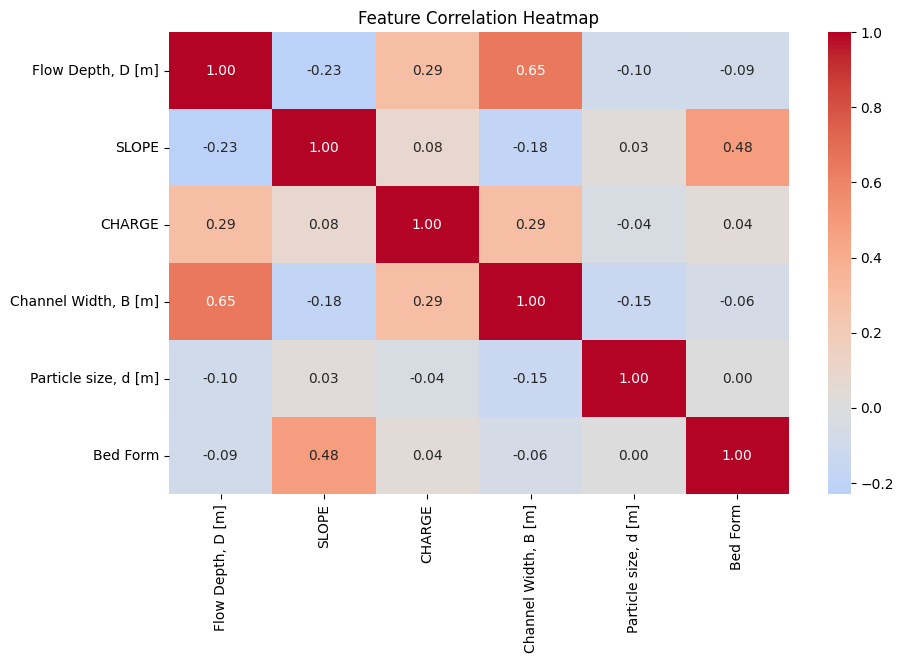

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()


In [20]:
X = df.drop('Bed Form', axis=1)
y = df['Bed Form']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (2038, 5)
Test set size: (510, 5)


In [21]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

In [22]:
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred))


Training Accuracy: 0.9593
Test Accuracy: 0.9647

Classification Report (Test Set):
              precision    recall  f1-score   support

           2       0.96      1.00      0.98       492
           3       0.00      0.00      0.00        15
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1

    accuracy                           0.96       510
   macro avg       0.24      0.25      0.25       510
weighted avg       0.93      0.96      0.95       510


Confusion Matrix (Test Set):
[[492   0   0   0]
 [ 15   0   0   0]
 [  2   0   0   0]
 [  1   0   0   0]]


d:\Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
